# Exercises for Session 6: Web Scraping 1

In session 5 you briefly touched upon extracting data from the internet. You worked with APIs which can be used to download data from a webpage in a structured way. Sometimes the webpage do not provide an API or the data you can download via the API is limited. In that case we will need to extract the data from the webpage ourselves. 

In the next three sessions you will learn how to extract data from a webpage when you cannot use an API. It involves mapping through the webpage (find the right URLs) and extracting the desired data from the webpage's HTML string (HTML: the underlying language behind a webpage).

*(Note: I recommend to use Chrome as your browser during the next three sessions. Lectures and exercises are solely based on Chrome.)*

# Part 1: Scraping Jobnet.dk

When we want to scrape a webpage, the first thing we do is to investigate the webpage. First, we need to get an overview of the URLs of all the webpages we want to scrape. Second, we download the HTML-string from the webpages. You can learn more about this in video 6.1:

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

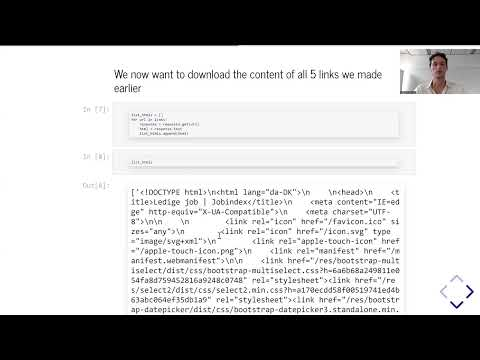

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xiu-acDIm28', width=640, height=360)

> **Ex. 6.1.1:** Go to  www.jobnet.dk and investigate the page. Locate the webpage that shows the job postings. Use the `request` module to extract the HTML-string of the webpage. 
>
> Remember to add name and email to the header of your request, so the website managers can see that you are not a malicious actor.

> *Note:* The HTML-string will not make a lot of sense right now, but try to take a look at it. In the next session we will learn how to extract data from the HTML-string.

> *Note:* The website is in Danish, but it should be no problem for non-Danish speaking persons to solve the exercises.

In [2]:
# YOUR CODE HERE
import requests

response = requests.get('https://job.jobnet.dk/CV/FindWork?Offset=0&SortValue=BestMatch', headers={'name':'Bertram Illum','email':'tkm454@alumni.ku.dk'})

When you have completed exercise 6.1.1 you have scraped your first webpage! I.e., you have retrieved the HTML-string of the webpage you wanted to extract data from. In session 7 we will learn how to get the relevant data from the HTML-string. But first we want to learn about how to go through all the webpages we want to scrape and retrieve the HTML-strings behind: `mapping`

> **Ex. 6.1.2:** Start your `mapping`: We want to figure out what URLs we need to scrape to collect job posting data. 

> You will see that there are 20 job postings per page, and that you can click through the pages with job postings on the bottom of the page. Figure out what the structure of the URL is, so you can click through the job posting pages by changing the URL. 

> Describe the structure of the URL in plain words below. What is the relevant paging parameter (the parameter you need to change to go to the next webpage) and how does it behave when you change page?

### Answer
The relevant paging parameter is 20. The URL changes from Offset=0 to Offset=20 to Offset=40 moving from page 1 to 2 to 3. 

> **Ex. 6.1.3:** Make a list of the URLs of the first 5 webpages with job postings.

> *Hint 1:* Design a `for loop` using the `range` function that changes the paging parameter in the URL.
>
> *Hint 2:* How do you change the paging parameter in the URL-string? Here string formatting is your friend! Read about it [here](https://realpython.com/python-string-formatting) (I recommend that you adopt the f-strings formatting which is a relatively new and nice feature in Python). 

In [3]:
# YOUR CODE HERE
links = []
for page in range(0,81,20):
    url =f'https://job.jobnet.dk/CV/FindWork?Offset={page}&SortValue=BestMatch'
    links.append(url)

links

['https://job.jobnet.dk/CV/FindWork?Offset=0&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=20&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=40&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=60&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=80&SortValue=BestMatch']

> **Ex. 6.1.4:** Now loop through the list and scrape the HTML-strings of all 5 webpages using the `request` module again and save the HTML-strings in a list. 

> - Use the `time.sleep()` function to limit the rate of your calls. This is important to avoid overloading the webpage's server. Worst case, you can be banned from the website.

> - ***Extra:*** Monitor the time left to completing the loop by using `tqdm.tqdm()` function.

In [4]:
# YOUR CODE HERE
import tqdm
import time

list_htmls = []
for url in tqdm.tqdm(links): #Track the time left before completing the loop
    response = requests.get(url)
    html = response.text
    list_htmls.append(html)
    time.sleep(0.5) #Sleep for 0.5 seconds

list_htmls

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


['\r\n\r\n\r\n<!DOCTYPE html>\r\n<html class="no-js jobnet"\r\n      lang="da"\r\n      data-build="2023.2.0.129"\r\n      data-ng-app="Jobnet">\r\n\r\n<head data-jn-header-manager>\r\n    <meta charset="utf-8" />\r\n\r\n    <script src="https://cdn-eu.cookietractor.com/cookietractor.js" data-lang="da-DK" data-id="997a8f64-3979-4aaf-a7ad-d75d4a075a3e"></script>\r\n\r\n    \r\n    <title>Find job</title>\r\n    <meta name="description"\r\n          content="" />\r\n    <meta name="viewport"\r\n          content="width=device-width, initial-scale=1" />\r\n    \r\n    <link href="/CV/bundles/jobnet/styles/themes/jqueryui?v=tnDXbSoBDWbbJp6Mq-7PNZ2WgEiO41s0WI3Jpab9v5k1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalization?v=8SYC4_fo8F7yKup3Ic3pmxETVZDCktLLOPXjtIVe2Zk1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalizationprint?v=oRijEx5qJuAAPi5Biy05nn2lsj7dhIKZLJ8zNwNOAZs1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/

#### In the video below (video 6.2) you will learn about logging and handling exceptions. Watch it before continuing with Ex.6.1.5

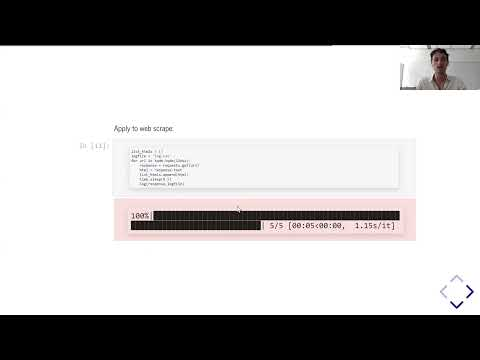

In [5]:
YouTubeVideo('d9fx8m7dQmI', width=640, height=360)

> **Ex. 6.1.5:** Repeat 6.1.4, but now log your activity as well. 

In [6]:
# YOUR CODE HERE
import os

# Define the log function to gather the log information
def log(response,logfile,output_path=os.getcwd()):
    # Open or create the csv file
    if os.path.isfile(logfile): #If the log file exists, open it and allow for changes     
        log = open(logfile,'a')
    else: #If the log file does not exist, create it and make headers for the log variables
        log = open(logfile,'w')
        header = ['timestamp','status_code','length','output_file']
        log.write(';'.join(header) + "\n") #Make the headers and jump to new line
        
    # Gather log information
    status_code = response.status_code #Status code from the request result
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time())) #Local time
    length = len(response.text) #Length of the HTML-string
    
    # Open the log file and append the gathered log information
    with open(logfile,'a') as log:
        log.write(f'{timestamp};{status_code};{length};{output_path}' + "\n") #Append the information and jump to new line

In [7]:
list_htmls = []
logfile = 'log.csv'
for url in tqdm.tqdm(links):
    response = requests.get(url)
    html = response.text
    list_htmls.append(html)
    time.sleep(0.5)
    log(response,logfile)

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


> **Ex. 6.1.6:** It is a good idea to build a scraper that can handle exceptions (for example a link that for some reason does not exist or connection problems). Build such an exception into your scraper from 6.1.5, so you do not loose the scraped data if it crashes halfway through.

In [8]:
# YOUR CODE HERE
import json

list_htmls = []

for url in tqdm.tqdm(links):
    try:
        response = requests.get(url)
    except Exception as e:
        print(url) #Print url
        print(e) #Print error
        with open("list_htmls", "w") as l: #Save the list_htmls as a json file to retrieve at another time
            json.dump(list_htmls, l)
        continue #Continue to next iteration of the loop
    html = response.text
    list_htmls.append(html)
    time.sleep(0.5) #Sleep for 0.5 seconds

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


# Part 2: Locating data through the network panel

Sometimes you may be fortunate to find the request that the webpage sends to the server to retrieve the data for the webpage. In that case, we can just replicate the request to receive the data in a structured format (JSON). Then we do not need to struggle with the HTML-strings.

To do this, we first need to find the request. For that purpose, the **network panel** in the Chrome Developer Tools is useful. The network panel monitors all the uploads and downloads to and from the webpage. You can read more about the network panel [here](https://developer.chrome.com/docs/devtools/network/).

**Watch the video below (video 6.3) before working on the exercises.**

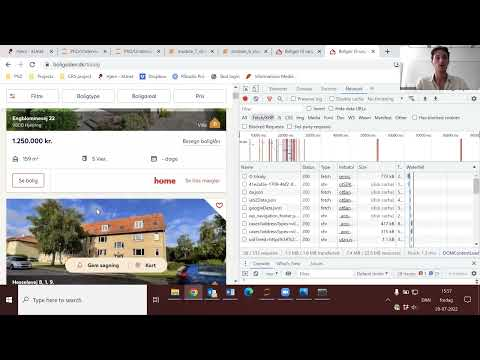

In [9]:
YouTubeVideo('isUxBDzfWMg', width=640, height=360)

> **Ex. 6.2.1:** Go to the job posting page at www.jobnet.dk again. Open the network panel and choose *Fetch/XHR* type ([Read more: XMLHttpRequest](https://en.wikipedia.org/wiki/XMLHttpRequest)). If you update the page, you will see all the XHR resources the page generates. 

> Go through all the XHRs and find the XHR that carries the information about the different job postings. What is the name of the XHR?
>
>*Note: There is no smart way to do this. You just need to go through all the XHRs and inspect the information they carry.*

### Answer
The name is Search

> **Ex. 6.2.2:** Use the request URL to download the JSON file consisting of the first 20 job postings. Return the request result in JSON format.

In [10]:
# YOUR CODE HERE
response = requests.post('https://job.jobnet.dk/CV/FindWork/Search', headers={'name':'Bertram Illum', 'email':'tkm454@alumni.ku.dk'})

> **Ex. 6.2.3:** The JSON file consists of three different key-value pairs. We are only interested in the pair that contains the job postings. Find the right key-value pair and convert the JSON data to a Pandas dataframe.

In [11]:
# YOUR CODE HERE
result = response.json()
result

{'Expression': {'ShowNearbyCriteria': True,
  'Offset': 0,
  'Count': 20,
  'SearchString': None,
  'SortValue': None,
  'Ids': [],
  'IdsToExclude': [],
  'EarliestPublicationDate': '0001-01-01T00:00:00',
  'HotJob': False,
  'Abroad': False,
  'NearBy': None,
  'ExternalJob': None,
  'WorkPlaceNotStatic': None,
  'WorkHourMin': None,
  'WorkHourMax': None,
  'OnlyGeoPoints': False,
  'Facets': {'Region': [],
   'Country': [],
   'Municipality': [],
   'PostalCode': [],
   'HiringOrgName': [],
   'OccupationAreas': [],
   'OccupationGroups': [],
   'Occupations': [],
   'EmploymentType': [],
   'WorkHours': [],
   'WorkHourPartTime': [],
   'JobAnnouncementType': [],
   'WorkPlaceNotStatic': []},
  'LocatedIn': None,
  'LocationZip': None,
  'Location': None,
  'SearchInGeoDistance': 0,
  'IsWorkInDenmarkJob': False,
  'SimilarOccupations': None},
 'Facets': {'Region': [{'Id': 0,
    'Value': 'Hovedstaden og Bornholm',
    'Count': 6448},
   {'Id': 0, 'Value': 'Midtjylland', 'Count': 

In [12]:
result_jobpostings = result['JobPositionPostings']

In [13]:
import pandas as pd

data = pd.DataFrame(result_jobpostings)

data

,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,1.0,Holdfører ved Løjtnantsuddannelsen i Slagelse ...,Holdfører ved Løjtnantsuddannelsen i Slagelse ...,Har du mod på et stort ledelsesansvar? Har kom...,Antvorskov Kaserne,Charlottedal Alle 4,4200,Slagelse,...,99999999,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884751,https://job.jobnet.dk/CV/FindWork/Details/5884751,True,5884751,55.3811,11.3784
1,0,False,1.0,Servicevagt stationær til Detailbutik i Københ...,Servicevagt stationær til Detailbutik i Københ...,Vi søger en serviceminded servicevagt på delti...,Vagtteam DK ApS,XX,1100,København K,...,37835935,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884750,https://job.jobnet.dk/CV/FindWork/Details/5884750,True,5884750,55.6799,12.5828
2,0,False,1.0,Skjalm P. søger dygtige lørdagsafløsere til bu...,Skjalm P. søger dygtige lørdagsafløsere til bu...,Beskrivelse af opgaven\nH. Skjalm P. søger dyg...,H. SKJALM P.,Nikolaj Plads 9,1067,København K,...,18619849,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5438710,https://job.jobnet.dk/CV/FindWork/Details/5438710,True,5438710,55.6788,12.5823
3,0,False,1.0,Brænder du for en solid sagsbehandling af bygg...,Brænder du for en solid sagsbehandling af bygg...,"Vi søger en byggesagsbehandler, der har lyst t...",Center for Plan og Miljø,Høvedstensvej 45,2650,Hvidovre,...,55606617,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884749,https://job.jobnet.dk/CV/FindWork/Details/5884749,True,5884749,55.6428,12.4642
4,0,False,1.0,Køkkenchef med gode lederegenskaber og godt hu...,Køkkenchef med gode lederegenskaber og godt hu...,Vi søger en passioneret og erfaren køkkenchef ...,Grammo ApS,Havnen 11,8700,Horsens,...,42942820,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884748,https://job.jobnet.dk/CV/FindWork/Details/5884748,True,5884748,55.8589,9.8616
5,0,False,1.0,"Da vi står for en større udvidelse, søger vi e...","Da vi står for en større udvidelse, søger vi e...",\nH. Skjalm P. udvid...,H. SKJALM P.,Nikolaj Plads 9,1067,København K,...,18619849,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5775140,https://job.jobnet.dk/CV/FindWork/Details/5775140,True,5775140,55.6788,12.5823
6,0,False,1.0,Kok,Kok,Vi søger en passioneret og dygtig kok til at d...,Grammo ApS,Havnen 11,8700,Horsens,...,42942820,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884747,https://job.jobnet.dk/CV/FindWork/Details/5884747,True,5884747,55.8589,9.8616
7,0,False,1.0,Rengøringsass,Rengøringsass,Vi søger medarbejder til rengøring af kontorer...,BENTE'S RENGØRING BENTE JACOBSEN,,,,...,16919381,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5146017,https://job.jobnet.dk/CV/FindWork/Details/5146017,True,5146017,55.4175,10.3069
8,0,False,1.0,"Relations kompetent pædagog, der ønsker at arb...","Relations kompetent pædagog, der ønsker at arb...",Måske er du nyuddannet og ambitiøs eller erfar...,Kolding Kommune - Børnegården Vester Nebel,Donsvej 1,6040,Egtved,...,29189897,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884746,https://job.jobnet.dk/CV/FindWork/Details/5884746,True,5884746,55.5683,9.4019
9,0,False,1.0,Postomdeler til dagshold,Postomdeler til dagshold,Vi søger pt. 1 postomdeler til vores dagsomdel...,PM-DISTRIBUTION ApS,Masnedøgade 20,2100,København Ø,...,34739080,False,False,https://job.jobnet.dk/CV/FindWo

> **Ex. 6.2.4:** At this point, we have information about the first 20 job postings. Now we want the job postings of the first 5 pages, i.e. the first 100 job postings. 

> Use the same procedure as in **Ex. 6.1.3-4** to download the first 100 postings and save them in a dataframe.
>
> *Note: Remember to limit the rate of your calls, log your activity, and think about how to handle exceptions.*

> *Hint: Recall the paging parameter from **Ex. 6.1.2**. You can use the same paging parameter in the new request URL to loop through the 5 pages.*

In [14]:
links = []

for offset in range(0,100,20):
    url = f'https://job.jobnet.dk/CV/FindWork/Search?offset={offset}'
    links.append(url)

links

['https://job.jobnet.dk/CV/FindWork/Search?offset=0',
 'https://job.jobnet.dk/CV/FindWork/Search?offset=20',
 'https://job.jobnet.dk/CV/FindWork/Search?offset=40',
 'https://job.jobnet.dk/CV/FindWork/Search?offset=60',
 'https://job.jobnet.dk/CV/FindWork/Search?offset=80']

In [15]:
result_jobpostings_all = []  # Initialize an empty list to store all the results

logfile = 'log.csv'
for url in tqdm.tqdm(links):
    response = requests.post(url)
    result = response.json()
    result_jobpostings = result['JobPositionPostings']
    result_jobpostings_all.extend(result_jobpostings)
    time.sleep(0.5)  # Sleep for 0.5 seconds
    log(response,logfile)

data = pd.DataFrame(result_jobpostings_all)
data

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


,AutomatchType,Abroad,Weight,Title,JobHeadline,Presentation,HiringOrgName,WorkPlaceAddress,WorkPlacePostalCode,WorkPlaceCity,...,HiringOrgCVR,UserLoggedIn,AnonymousEmployer,ShareUrl,DetailsUrl,JobLogUrl,HasLocationValues,ID,Latitude,Longitude
0,0,False,1.0,Holdfører ved Løjtnantsuddannelsen i Slagelse ...,Holdfører ved Løjtnantsuddannelsen i Slagelse ...,Har du mod på et stort ledelsesansvar? Har kom...,Antvorskov Kaserne,Charlottedal Alle 4,4200,Slagelse,...,99999999,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884751,https://job.jobnet.dk/CV/FindWork/Details/5884751,True,5884751,55.3811,11.3784
1,0,False,1.0,Servicevagt stationær til Detailbutik i Københ...,Servicevagt stationær til Detailbutik i Københ...,Vi søger en serviceminded servicevagt på delti...,Vagtteam DK ApS,XX,1100,København K,...,37835935,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884750,https://job.jobnet.dk/CV/FindWork/Details/5884750,True,5884750,55.6799,12.5828
2,0,False,1.0,Skjalm P. søger dygtige lørdagsafløsere til bu...,Skjalm P. søger dygtige lørdagsafløsere til bu...,Beskrivelse af opgaven\nH. Skjalm P. søger dyg...,H. SKJALM P.,Nikolaj Plads 9,1067,København K,...,18619849,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5438710,https://job.jobnet.dk/CV/FindWork/Details/5438710,True,5438710,55.6788,12.5823
3,0,False,1.0,Brænder du for en solid sagsbehandling af bygg...,Brænder du for en solid sagsbehandling af bygg...,"Vi søger en byggesagsbehandler, der har lyst t...",Center for Plan og Miljø,Høvedstensvej 45,2650,Hvidovre,...,55606617,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884749,https://job.jobnet.dk/CV/FindWork/Details/5884749,True,5884749,55.6428,12.4642
4,0,False,1.0,Køkkenchef med gode lederegenskaber og godt hu...,Køkkenchef med gode lederegenskaber og godt hu...,Vi søger en passioneret og erfaren køkkenchef ...,Grammo ApS,Havnen 11,8700,Horsens,...,42942820,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884748,https://job.jobnet.dk/CV/FindWork/Details/5884748,True,5884748,55.8589,9.8616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,False,1.0,"Slagtersvend, SuperBrugsen, Vonsild (Kolding)","Slagtersvend, SuperBrugsen, Vonsild (Kolding)",SuperBrugsen Vonsild (Kolding) Du bliver en de...,SuperBrugsen,Vestre Ringgade 4,6000,Kolding,...,26259495,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884662,https://job.jobnet.dk/CV/FindWork/Details/5884662,True,5884662,55.4878,9.4657
96,0,False,1.0,Handicaphjælper søges til nattevagt - Broby,Handicaphjælper søges til nattevagt - Broby,OMRÅDE: 5672 Broby\nLIDT OM MIG:Jeg er en man...,HANDICAPFORMIDLINGEN ApS,,5672,Broby,...,34605416,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5740132,https://job.jobnet.dk/CV/FindWork/Details/5740132,True,5740132,55.2451,10.2521
97,0,False,1.0,Leder til franchise søges,Leder til franchise søges,Vil du opbygge og drive din egen forretning i ...,Majestic Air ApS,Kyse Bygade 20,4700,Næstved,...,43846795,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5882267,https://job.jobnet.dk/CV/FindWork/Details/5882267,True,5882267,55.2738,11.6279
98,0,False,1.0,Indkøber,Indkøber,Strategisk indkøber til global leverandør af k...,POULSEN ApS,,7100,Vejle,...,29918147,False,False,https://job.jobnet.dk/CV/FindWork/DetailsSocia...,https://job.jobnet.dk/CV/FindWork/Details/5884658,https://job.jobnet.dk/CV/FindWork/Details/5884658,True,5884658,55.6905,9.5066


> **Ex. 6.2.5 (optional):** What are the top 5 occupation areas with most job postings out of the 100 postings? How many job postings do the top 5 occupation areas have each?

In [16]:
# YOUR CODE HERE
occupation_counts = data['OccupationArea'].value_counts()

# Get the top 5 occupation areas
top_5_occupation_areas = occupation_counts.head()

# Display the top 5 occupation areas and their respective job posting counts
print("Top 5 Occupation Areas:")
print(top_5_occupation_areas)

Top 5 Occupation Areas:
Akademisk arbejde                           17
Sundhed, omsorg og personlig pleje          15
Pædagogisk, socialt og kirkeligt arbejde    14
Salg, indkøb og markedsføring               10
Hotel, restauration, køkken, kantine         7
Name: OccupationArea, dtype: int64
